In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_excel('/content/nasdaq.xlsx')

In [3]:
df.head()


,Date,Open,High,Low,Close,Volume
0,2020-01-27 16:00:00,9092.46,9185.45,9088.04,9139.31,0
1,2020-01-28 16:00:00,9201.82,9288.87,9182.33,9269.68,0
2,2020-01-29 16:00:00,9318.26,9329.12,9249.04,9275.16,0
3,2020-01-30 16:00:00,9211.15,9303.00,9185.18,9298.93,0
4,2020-01-31 16:00:00,9324.33,9324.80,9123.22,9150.94,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
725,2022-12-09 16:00:00,11038.17,11138.70,10999.26,11004.62,0
726,2022-12-12 16:00:00,11015.48,11144.67,10984.82,11143.74,0
727,2022-12-13 16:00:00,11542.84,11571.64,11160.54,11256.81,0
728,2022-12-14 16:00:00,11248.09,11352.09,11065.24,11170.89,0
729,2022-12-15 16:00:00,11012.62,11029.57,10775.61,10810.53,0


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.0
mean,12357.828973,12461.522973,12239.400740,12356.094932,0.0
std,2098.032140,2087.080985,2098.181585,2093.177113,0.0
min,6847.280000,6984.940000,6631.420000,6860.670000,0.0
25%,10991.285000,11118.497500,10876.192500,10999.955000,0.0
50%,12502.025000,12588.725000,12362.005000,12452.135000,0.0
75%,14002.265000,14124.195000,13905.937500,14024.410000,0.0
max,16120.920000,16212.230000,16017.230000,16057.440000,0.0


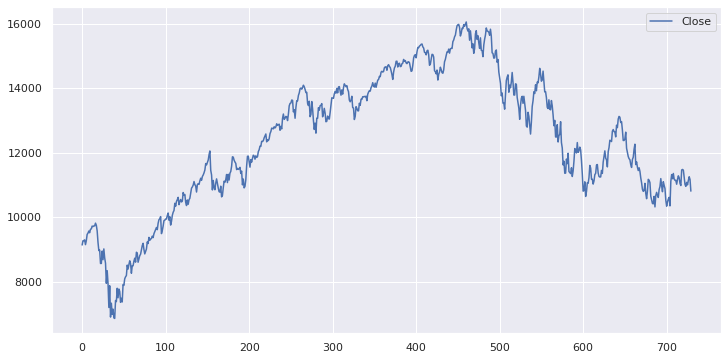

In [6]:
df[['Close']].plot(figsize=(12,6));


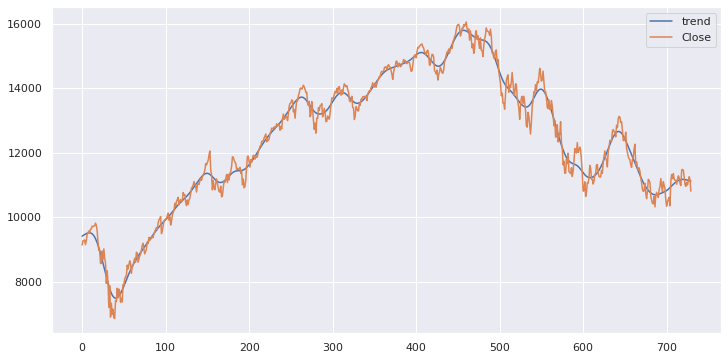

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5013408039920504,
 0.5328479583759445,
 9,
 720,
 {'1%': -3.439464954327953,
  '5%': -2.8655625802683473,
  '10%': -2.5689120852623457},
 9570.165814262373)

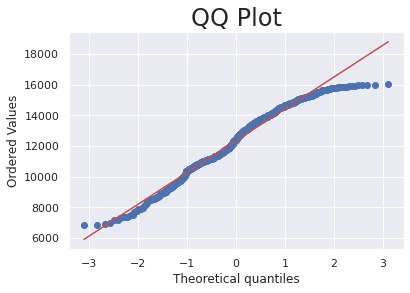

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


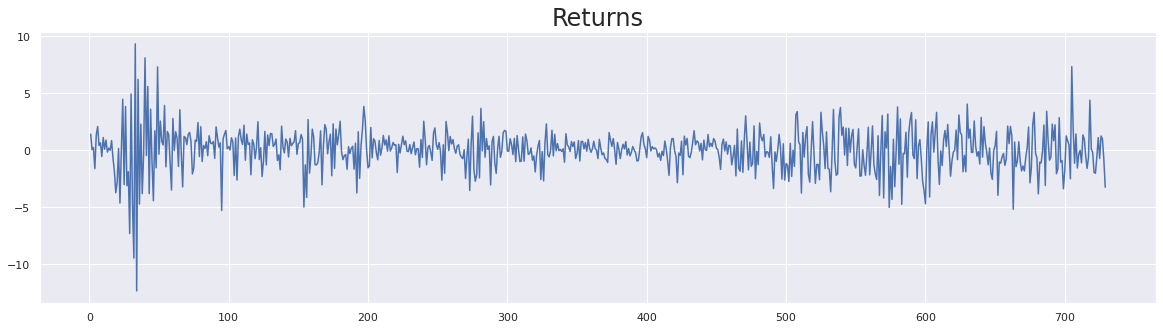

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


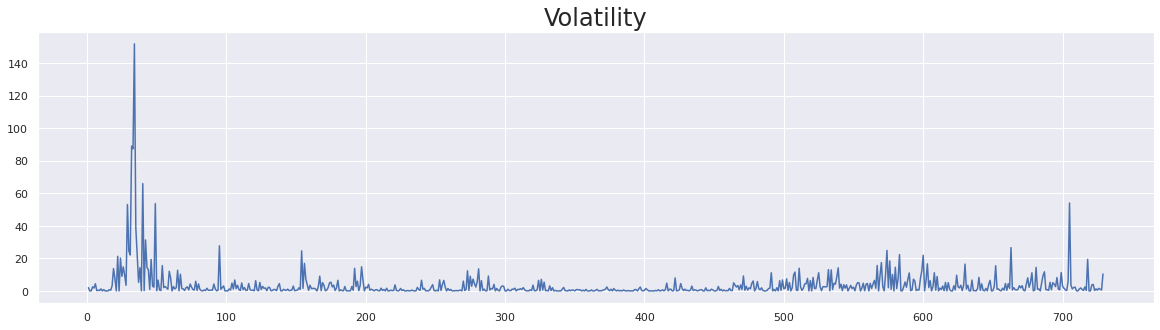

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

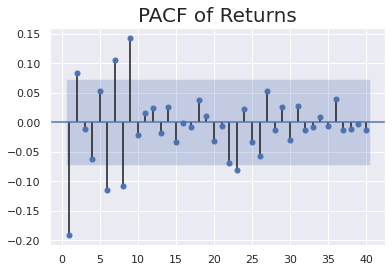

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

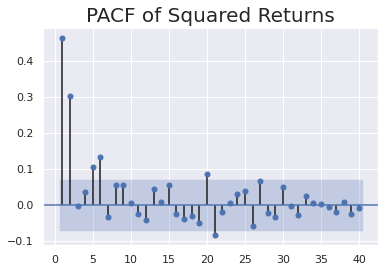

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 23.5 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 68005545769.33617
Iteration:      2,   Func. Count:     12,   Neg. LLF: 388039640.72868043
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1505.9368661599178
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1444.8459463452714
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1444.8459427486387
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1444.8459427486393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1444.8459427486387
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1444.85
Distribution:                  Normal   AIC:                           2895.69
Method:            Maximum Likelihood   BIC:                           2909.47
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1075  6.703e-02      1.604      0.109 [-2.387e-02,  0.239]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.3827      0.249      9.554  1.252e-21 [  1.894,  2.872]
alpha[1]       0.2953  8.811e-02      3.352  8.030e-04 [  0.123,  0.468]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1407.4381225169802
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1407.438110370962
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1407.44
Distribution:                  Normal   AIC:                           2822.88
Method:            Maximum Likelihood   BIC:                           2841.24
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0829  5.889e-02      1.407      0.159 [-3.256e-02,  0.198]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.4630      0.220      6.643  3.075e-11   [  1.031,  1.895]
alpha[1]       0.2724      0.102      2.666  7.676e-03 [7.213e-02,  0.473]
alpha[2]       0.3294  7.147e-02      4.608  4.056e-06   [  0.189,  0.469]
==========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1410.0785457640013
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1393.092603749369
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1393.092603749314
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1393.09
Distribution:                  Normal   AIC:                           2796.19
Method:            Maximum Likelihood   BIC:                           2819.14
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0647  5.711e-02      1.133      0.257 [-4.726e-02,  0.177]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.1024      0.203      5.420  5.962e-08    [  0.704,  1.501]
alpha[1]       0.2064      0.106      1.941  5.228e-02 [-2.035e-03,  0.415]
alpha[2]       0.2902  6.311e-02      4.598  4.269e-06    [  0.166,  0.414]
alpha[3]       0.2255  6.640e-02      3.396  6.829e-04  [9.538e-02,  0.356]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     88,   Neg. LLF: 1848.941205862675
Iteration:     10,   Func. Count:    174,   Neg. LLF: 1412.3507972256534
Iteration:     15,   Func. Count:    260,   Neg. LLF: 1363.661145307617
Iteration:     20,   Func. Count:    344,   Neg. LLF: 1363.4466810359236
Iteration:     25,   Func. Count:    423,   Neg. LLF: 1363.4461763245563
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1363.4461763244894
            Iterations: 25
            Function evaluations: 423
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1363.45
Distribution:                  Normal   AIC:                           2756.89
Method:            Maximum Likelihood   BIC:                           2825.77
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0877  5.531e-02      1.585      0.113 [-2.072e-02,  0.196]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4912      0.157      3.132  1.737e-03      [  0.184,  0.799]
alpha[1]       0.0405  6.290e-02      0.644      0.520   [-8.278e-02,  0.164]
alpha[2]       0.1752  5.733e-02      3.056  2.245e-03    [6.282e-02,  0.288]
alpha[3]       0.1329  5.846e-02      2.273  2.305e-02    [1.828e-02,  0.247]
alpha[4]       0.1320  7.658e-02      1.724  8.473e-02   [-1.808e-02,  0.282]
alpha[5]       0.1125  6.102e-02      1.843  6.531e-02   [-7.129e-03,  0.232]
alpha[6]       0.1551  7.479e-02      2.074  3.811e-02    [8.500e-03,  0.302]
alpha[7]       0.0114  3.289e-02      0.347      0.728 [-5.304e-02,7.589e-02]
alpha[8]       0.0000  2.693e-02      0.000      1.000 [-5.278e-02,5.278e-02]
alpha[9]       0.0000  2.628e-02      0.000      1.000 [-5.151e-02,5.151e-02]
alpha[10]  2.5434e-13  4.155e-02  6.121e-12      1.000 [-8.143e-02,8.143e-02]
alpha[11]      0.0364  3.139e-02      1.159      0.246 [-2.513e-02,9.792e-02]
alpha[12]      0.0000  4.386e-02      0.000      1.000 [-8.596e-02,8.596e-02]
alpha[13]      0.1000  5.324e-02      1.878  6.032e-02   [-4.342e-03,  0.204]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1969.2992817193006
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1372.349043375066
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1372.35
Distribution:                  Normal   AIC:                           2752.70
Method:            Maximum Likelihood   BIC:                           2771.06
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0711  5.699e-02      1.247      0.212 [-4.064e-02,  0.183]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0721  4.838e-02      1.490      0.136 [-2.273e-02,  0.167]
alpha[1]       0.1472  4.817e-02      3.056  2.241e-03  [5.281e-02,  0.242]
beta[1]        0.8374  5.440e-02     15.394  1.793e-53    [  0.731,  0.944]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1417.836885453157
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1372.3562906386933
Iteration:     15,   Func. Count:    103,   Neg. LLF: 1372.349043514588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1372.3490434588762
            Iterations: 15
            Function evaluations: 103
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1372.35
Distribution:                  Normal   AIC:                           2754.70
Method:            Maximum Likelihood   BIC:                           2777.66
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0711  5.703e-02      1.246      0.213 [-4.071e-02,  0.183]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0721  4.464e-02      1.615      0.106 [-1.541e-02,  0.160]
alpha[1]       0.1472  4.367e-02      3.371  7.491e-04  [6.162e-02,  0.233]
beta[1]        0.8374      0.291      2.880  3.978e-03    [  0.268,  1.407]
beta[2]    5.0667e-16      0.283  1.791e-15      1.000    [ -0.555,  0.555]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 1392.897904213673
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1372.3659880156038
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1372.3490433370769
            Iterations: 14
            Function evaluations: 112
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1372.35
Distribution:                  Normal   AIC:                           2756.70
Method:            Maximum Likelihood   BIC:                           2784.25
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0711  5.709e-02      1.245      0.213 [-4.083e-02,  0.183]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0721  4.513e-02      1.597      0.110 [-1.636e-02,  0.161]
alpha[1]       0.1472  4.353e-02      3.382  7.190e-04  [6.191e-02,  0.233]
beta[1]        0.8374      0.303      2.761  5.761e-03    [  0.243,  1.432]
beta[2]        0.0000      0.442      0.000      1.000    [ -0.865,  0.865]
beta[3]    2.2538e-16      0.244  9.255e-16      1.000    [ -0.477,  0.477]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1392.234651953454
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1371.0631079069235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1371.0629012691193
            Iterations: 13
            Function evaluations: 95
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1371.06
Distribution:                  Normal   AIC:                           2752.13
Method:            Maximum Likelihood   BIC:                           2775.08
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0747  5.514e-02      1.355      0.175 [-3.336e-02,  0.183]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0930  7.273e-02      1.278      0.201 [-4.959e-02,  0.236]
alpha[1]       0.0635  7.066e-02      0.899      0.369 [-7.497e-02,  0.202]
alpha[2]       0.1095  9.488e-02      1.154      0.249 [-7.651e-02,  0.295]
beta[1]        0.8060  8.100e-02      9.951  2.506e-23    [  0.647,  0.965]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 1372.2913618959196
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1371.063167989185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1371.062901101252
            Iterations: 13
            Function evaluations: 108
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1371.06
Distribution:                  Normal   AIC:                           2754.13
Method:            Maximum Likelihood   BIC:                           2781.68
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0747  5.516e-02      1.354      0.176 [-3.340e-02,  0.183]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0930      0.104      0.896      0.370    [ -0.110,  0.296]
alpha[1]       0.0635  7.062e-02      0.899      0.369 [-7.492e-02,  0.202]
alpha[2]       0.1095  8.574e-02      1.277      0.202 [-5.857e-02,  0.278]
alpha[3]       0.0000      0.109      0.000      1.000    [ -0.213,  0.213]
beta[1]        0.8060      0.135      5.969  2.389e-09    [  0.541,  1.071]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 43794599661.97185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1361.0855101516577
            Iterations: 9
            Function evaluations: 72
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1361.09
Distribution:                  Normal   AIC:                           2732.17
Method:            Maximum Likelihood   BIC:                           2755.13
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -5.4812e-03  5.062e-02     -0.108      0.914 [ -0.105,9.374e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0374  1.833e-02      2.038  4.150e-02 [1.439e-03,7.329e-02]
alpha[1]       0.1915  6.612e-02      2.896  3.784e-03   [6.187e-02,  0.321]
gamma[1]      -0.1074  3.730e-02     -2.879  3.994e-03  [ -0.180,-3.427e-02]
beta[1]        0.9655  1.481e-02     65.198      0.000     [  0.936,  0.995]
============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1366.29
Distribution:                  Normal   AIC:                           2742.57
Method:            Maximum Likelihood   BIC:                           2765.53
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0258  5.195e-02      0.496      0.620 [-7.604e-02,  0.128]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0822  8.112e-02      1.013      0.311 [-7.681e-02,  0.241]
alpha[1]       0.0308  4.535e-02      0.679      0.497 [-5.808e-02,  0.120]
gamma[1]       0.1534  8.748e-02      1.754  7.951e-02 [-1.806e-02,  0.325]
beta[1]        0.8644  8.213e-02     10.525  6.607e-26    [  0.703,  1.025]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1371.4302147745693
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1359.457142326924
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1359.4077915148666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1359.4077915148666
            Iterations: 16
            Function evaluations: 111
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1359.41
Distribution:                  Normal   AIC:                           2728.82
Method:            Maximum Likelihood   BIC:                           2751.77
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -9.5815e-03  5.066e-02     -0.189      0.850 [ -0.109,8.972e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0687  2.694e-02      2.551  1.074e-02  [1.593e-02,  0.122]
alpha[1]       0.0487  4.194e-02      1.161      0.245 [-3.349e-02,  0.131]
gamma[1]       0.1373  4.847e-02      2.832  4.621e-03  [4.228e-02,  0.232]
beta[1]        0.8692  3.692e-02     23.539 1.628e-122    [  0.797,  0.942]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1367.7751239853987
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1367.4029260051284
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1367.4029260051284
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1367.40
Distribution:                  Normal   AIC:                           2744.81
Method:            Maximum Likelihood   BIC:                           2767.76
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0869  5.046e-02      1.722  8.507e-02 [-1.201e-02,  0.186]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0452  6.008e-02      0.752      0.452 [-7.257e-02,  0.163]
phi            0.0000      0.132      0.000      1.000    [ -0.260,  0.260]
d              0.6218      0.115      5.417  6.055e-08    [  0.397,  0.847]
beta           0.5428      0.120      4.507  6.579e-06    [  0.307,  0.779]
===========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1644.678019892847
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1445.8728548334793
Iteration:     15,   Func. Count:     77,   Neg. LLF: 1444.8459427979258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1444.8459427979258
            Iterations: 15
            Function evaluations: 77
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1444.85
Distribution:                  Normal   AIC:                           2895.69
Method:            Maximum Likelihood   BIC:                           2909.47
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1075  6.703e-02      1.604      0.109 [-2.388e-02,  0.239]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.3827      0.249      9.554  1.252e-21 [  1.894,  2.872]
alpha[1]       0.2953  8.811e-02      3.352  8.030e-04 [  0.123,  0.468]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 5991.778112681943
Iteration:     10,   Func. Count:     89,   Neg. LLF: 1736.128914562399
Iteration:     15,   Func. Count:    125,   Neg. LLF: 1360.8070202053927
Iteration:     20,   Func. Count:    171,   Neg. LLF: 1360.8001603275557
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1360.8001446305657
            Iterations: 22
            Function evaluations: 195
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1360.80
Distribution:                  Normal   AIC:                           2733.60
Method:            Maximum Likelihood   BIC:                           2761.15
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:50:29   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0293  4.884e-05   -600.268      0.000 [-2.941e-02,-2.922e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0667  2.434e-02      2.742  6.108e-03 [1.903e-02,  0.114]
alpha[1]       0.1224  3.172e-02      3.858  1.142e-04 [6.020e-02,  0.185]
gamma[1]       0.6060      0.233      2.598  9.383e-03   [  0.149,  1.063]
beta[1]        0.8650  3.868e-02     22.362 9.146e-111   [  0.789,  0.941]
delta          0.7493      0.268      2.801  5.102e-03   [  0.225,  1.274]
==========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=24.33379463725453, pvalue=5.199763996821538e-06)

In [46]:
jarque_bera_test.statistic

24.33379463725453

In [47]:
jarque_bera_test.pvalue

5.199763996821538e-06

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      1.426475
2      0.059117
3      0.256276
4     -1.591473
5      1.338223
         ...   
725   -0.698249
726    1.264196
727    1.014650
728   -0.763271
729   -3.225884
Name: returns, Length: 729, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=796.7321944001137, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

796.7321944001137

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

5.104173701928238

coef. asimetria

In [53]:
returns.skew()

-0.3932403033456888

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -32.344
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -3.063
P-value                         0.002
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.408
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.375
P-value                         0.084
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        730 non-null    datetime64[ns]
 1   Open        730 non-null    float64       
 2   High        730 non-null    float64       
 3   Low         730 non-null    float64       
 4   Close       730 non-null    float64       
 5   Volume      730 non-null    int64         
 6   trend       730 non-null    float64       
 7   returns     729 non-null    float64       
 8   sq_returns  729 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 51.5 KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_excel("/content/nasdaq.xlsx")

In [66]:
data

,Date,Open,High,Low,Close,Volume
0,2020-01-27 16:00:00,9092.46,9185.45,9088.04,9139.31,0
1,2020-01-28 16:00:00,9201.82,9288.87,9182.33,9269.68,0
2,2020-01-29 16:00:00,9318.26,9329.12,9249.04,9275.16,0
3,2020-01-30 16:00:00,9211.15,9303.00,9185.18,9298.93,0
4,2020-01-31 16:00:00,9324.33,9324.80,9123.22,9150.94,0
...,...,...,...,...,...,...
725,2022-12-09 16:00:00,11038.17,11138.70,10999.26,11004.62,0
726,2022-12-12 16:00:00,11015.48,11144.67,10984.82,11143.74,0
727,2022-12-13 16:00:00,11542.84,11571.64,11160.54,11256.81,0
728,2022-12-14 16:00:00,11248.09,11352.09,11065.24,11170.89,0


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27 16:00:00,9139.31,0
1,2020-01-28 16:00:00,9269.68,0
2,2020-01-29 16:00:00,9275.16,0
3,2020-01-30 16:00:00,9298.93,0
4,2020-01-31 16:00:00,9150.94,0
...,...,...,...
725,2022-12-09 16:00:00,11004.62,0
726,2022-12-12 16:00:00,11143.74,0
727,2022-12-13 16:00:00,11256.81,0
728,2022-12-14 16:00:00,11170.89,0


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,9139.31,0,9269.68
1,2020-01-28 16:00:00,9269.68,0,9275.16
2,2020-01-29 16:00:00,9275.16,0,9298.93
3,2020-01-30 16:00:00,9298.93,0,9150.94
4,2020-01-31 16:00:00,9150.94,0,9273.40
...,...,...,...,...
725,2022-12-09 16:00:00,11004.62,0,11143.74
726,2022-12-12 16:00:00,11143.74,0,11256.81
727,2022-12-13 16:00:00,11256.81,0,11170.89
728,2022-12-14 16:00:00,11170.89,0,10810.53


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,9139.31,0,9269.68
1,2020-01-28 16:00:00,9269.68,0,9275.16
2,2020-01-29 16:00:00,9275.16,0,9298.93
3,2020-01-30 16:00:00,9298.93,0,9150.94
4,2020-01-31 16:00:00,9150.94,0,9273.40
...,...,...,...,...
724,2022-12-08 16:00:00,11082.00,0,11004.62
725,2022-12-09 16:00:00,11004.62,0,11143.74
726,2022-12-12 16:00:00,11143.74,0,11256.81
727,2022-12-13 16:00:00,11256.81,0,11170.89


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.24776525, 0.        , 0.26194088],
       [0.26194088, 0.        , 0.26253674],
       [0.26253674, 0.        , 0.26512134],
       ...,
       [0.46571459, 0.        , 0.47800913],
       [0.47800913, 0.        , 0.46866672],
       [0.46866672, 0.        , 0.42948339]])

In [73]:
price_volume_target_scaled_df.shape

(729, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [78]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

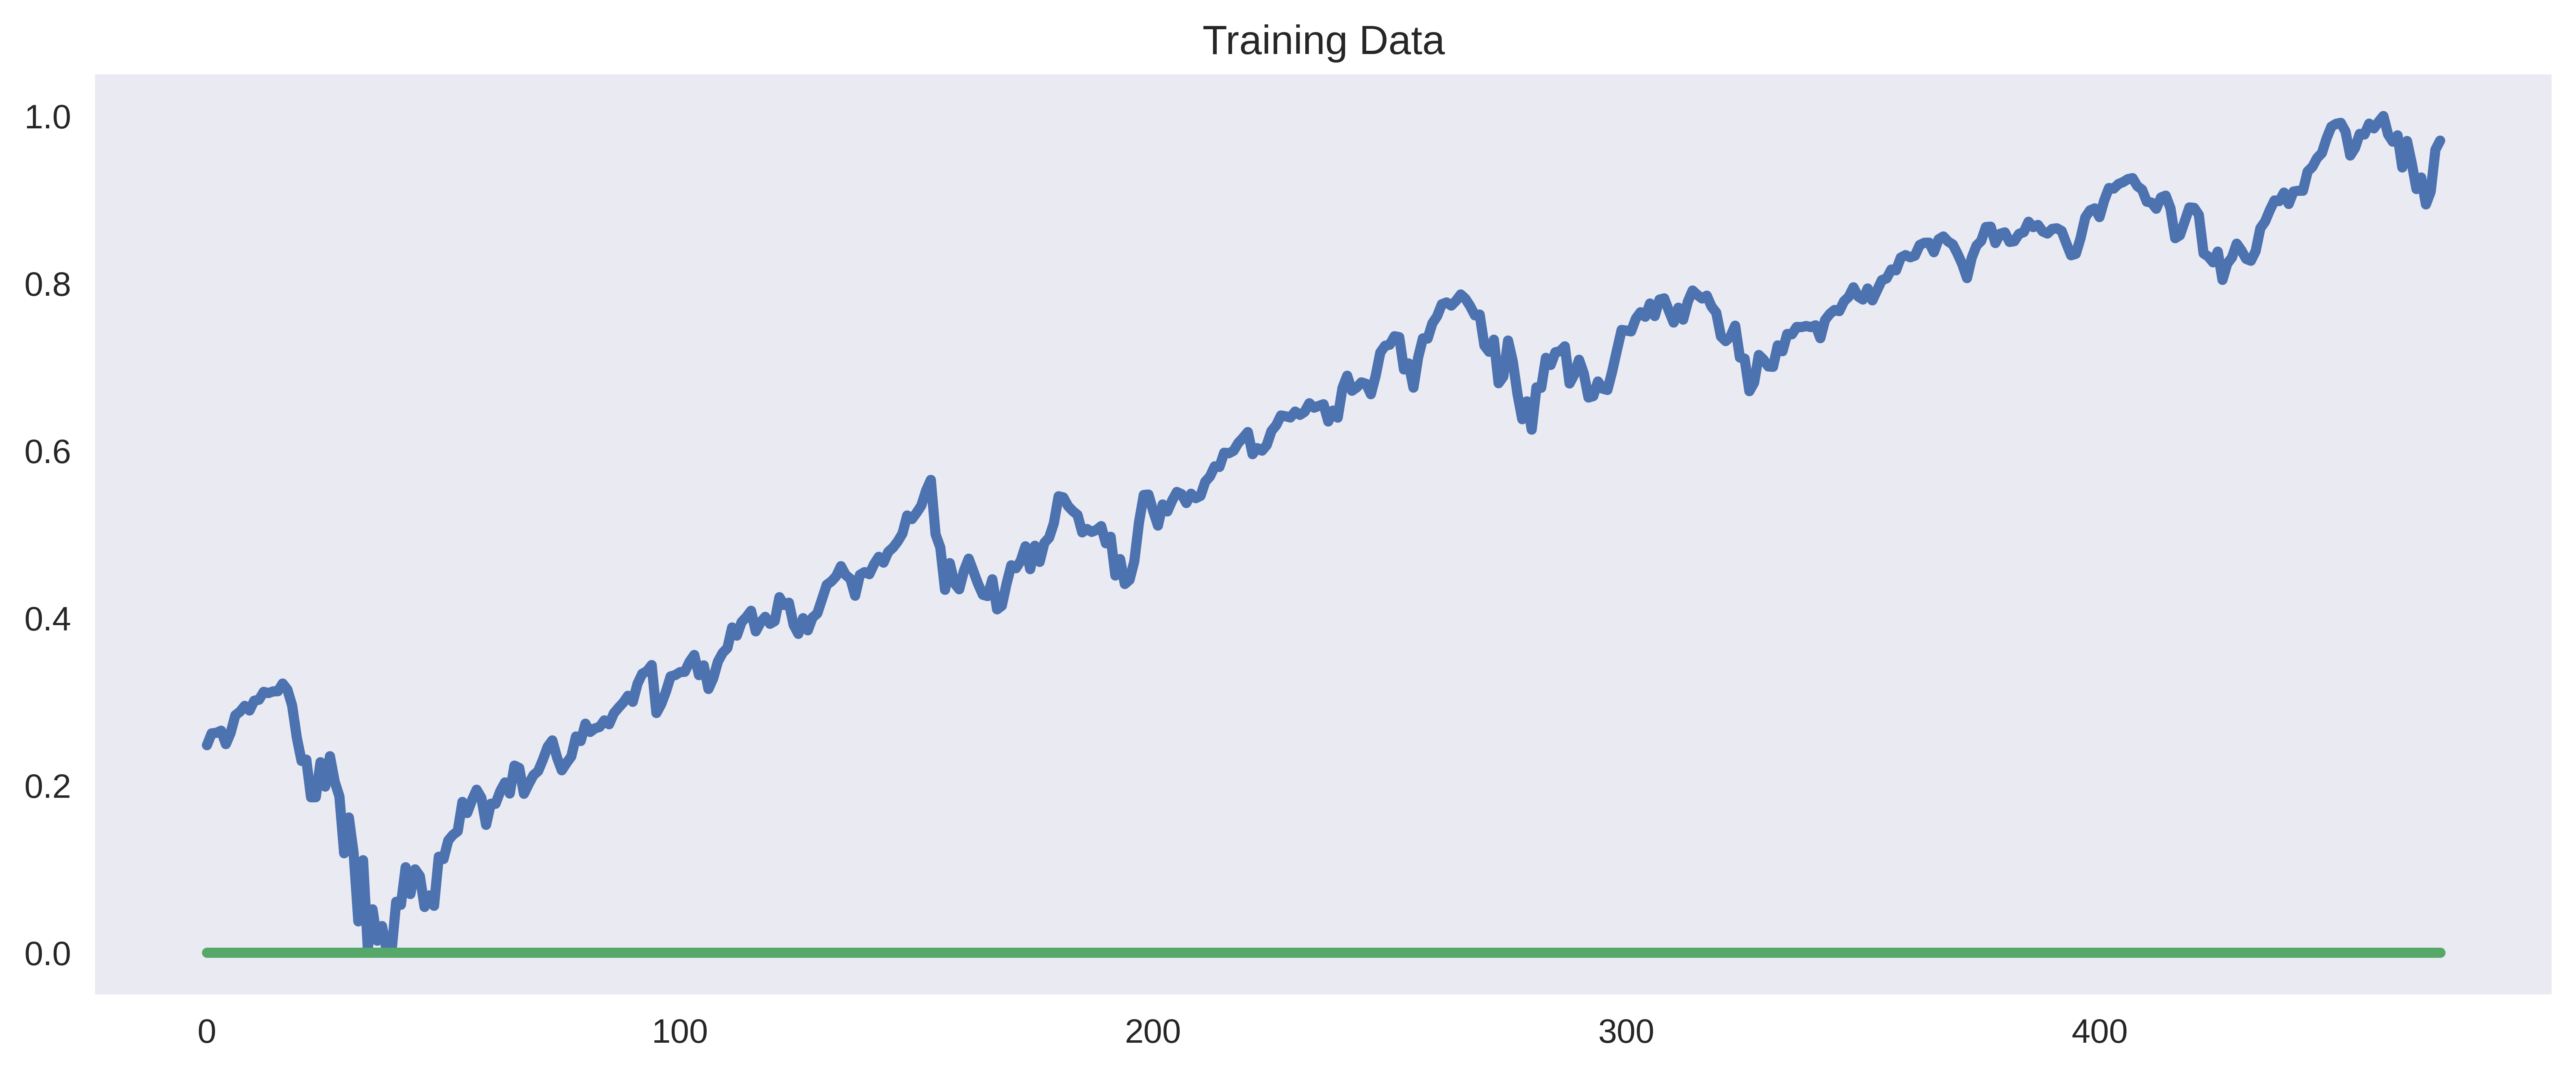

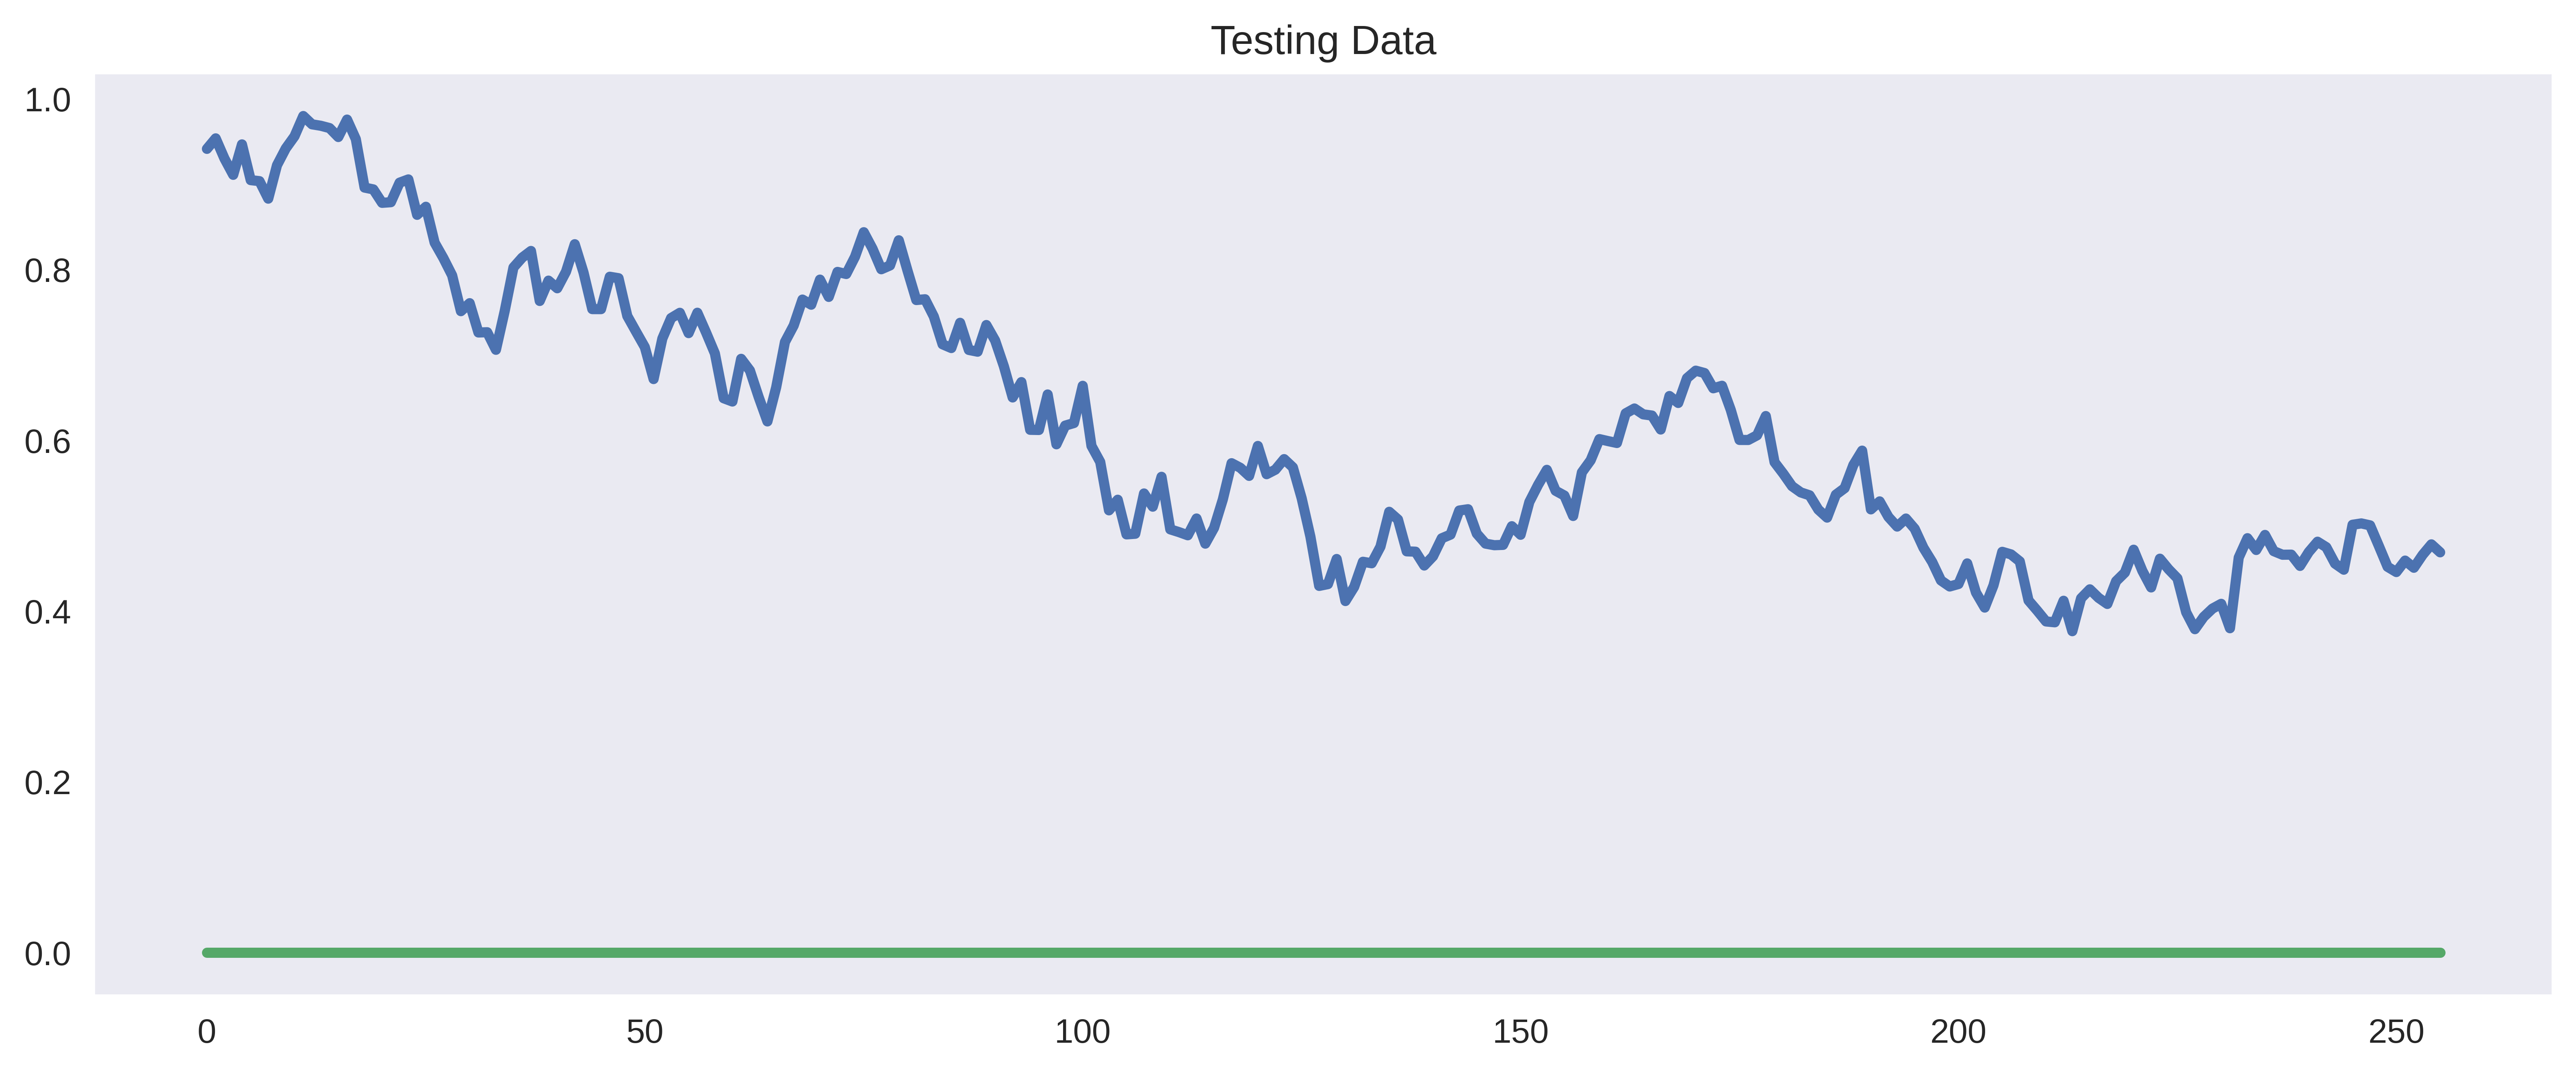

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.971979440742742


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.26084014],
       [0.27453337],
       [0.27510896],
       [0.27760561],
       [0.26206168],
       [0.2749241 ],
       [0.2953605 ],
       [0.29963642],
       [0.3063029 ],
       [0.30087897],
       [0.31221   ],
       [0.3133181 ],
       [0.32245813],
       [0.32098871],
       [0.32300641],
       [0.32317026],
       [0.3320393 ],
       [0.32508502],
       [0.30676925],
       [0.26944974],
       [0.24259579],
       [0.24418915],
       [0.2006737 ],
       [0.20076718],
       [0.24118414],
       [0.21302671],
       [0.24810796],
       [0.21875105],
       [0.20163371],
       [0.13599398],
       [0.17733207],
       [0.13613787],
       [0.05733637],
       [0.12803243],
       [0.02611932],
       [0.07130375],
       [0.03507344],
       [0.05195655],
       [0.02348612],
       [0.02150624],
       [0.08002994],
       [0.07650501],
       [0.11990912],
       [0.08890739],
       [0.11745239],
       [0.10967464],
       [0.07401362],
       [0.087

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

729

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27 16:00:00
1,2020-01-28 16:00:00
2,2020-01-29 16:00:00
3,2020-01-30 16:00:00
4,2020-01-31 16:00:00
...,...
724,2022-12-08 16:00:00
725,2022-12-09 16:00:00
726,2022-12-12 16:00:00
727,2022-12-13 16:00:00


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27 16:00:00,0.247765
1,2020-01-28 16:00:00,0.261941
2,2020-01-29 16:00:00,0.262537
3,2020-01-30 16:00:00,0.265121
4,2020-01-31 16:00:00,0.249030
...,...,...
724,2022-12-08 16:00:00,0.459001
725,2022-12-09 16:00:00,0.450588
726,2022-12-12 16:00:00,0.465715
727,2022-12-13 16:00:00,0.478009


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27 16:00:00,0.247765,0.260840
1,2020-01-28 16:00:00,0.261941,0.274533
2,2020-01-29 16:00:00,0.262537,0.275109
3,2020-01-30 16:00:00,0.265121,0.277606
4,2020-01-31 16:00:00,0.249030,0.262062
...,...,...,...
724,2022-12-08 16:00:00,0.459001,0.464888
725,2022-12-09 16:00:00,0.450588,0.456760
726,2022-12-12 16:00:00,0.465715,0.471373
727,2022-12-13 16:00:00,0.478009,0.483249


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,9139.31,0,9269.68
1,2020-01-28 16:00:00,9269.68,0,9275.16
2,2020-01-29 16:00:00,9275.16,0,9298.93
3,2020-01-30 16:00:00,9298.93,0,9150.94
4,2020-01-31 16:00:00,9150.94,0,9273.40
...,...,...,...,...
725,2022-12-09 16:00:00,11004.62,0,11143.74
726,2022-12-12 16:00:00,11143.74,0,11256.81
727,2022-12-13 16:00:00,11256.81,0,11170.89
728,2022-12-14 16:00:00,11170.89,0,10810.53


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27 16:00:00,9139.31,0,9269.68
1,2020-01-28 16:00:00,9269.68,0,9275.16
2,2020-01-29 16:00:00,9275.16,0,9298.93
3,2020-01-30 16:00:00,9298.93,0,9150.94
4,2020-01-31 16:00:00,9150.94,0,9273.40
...,...,...,...,...
725,2022-12-09 16:00:00,11004.62,0,11143.74
726,2022-12-12 16:00:00,11143.74,0,11256.81
727,2022-12-13 16:00:00,11256.81,0,11170.89
728,2022-12-14 16:00:00,11170.89,0,10810.53


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[ 9139.31,     0.  ],
       [ 9269.68,     0.  ],
       [ 9275.16,     0.  ],
       ...,
       [11256.81,     0.  ],
       [11170.89,     0.  ],
       [10810.53,     0.  ]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.24776525]),
 array([0.26194088]),
 array([0.26253674]),
 array([0.26512134]),
 array([0.24902982]),
 array([0.26234537]),
 array([0.28350171]),
 array([0.28792826]),
 array([0.2948296]),
 array([0.28921458]),
 array([0.30094479]),
 array([0.30209193]),
 array([0.31155395]),
 array([0.31003276]),
 array([0.31212154]),
 array([0.31229116]),
 array([0.32147265]),
 array([0.31427338]),
 array([0.29531238]),
 array([0.25667816]),
 array([0.22887818]),
 array([0.23052767]),
 array([0.18547925]),
 array([0.18557602]),
 array([0.2274168]),
 array([0.19826744]),
 array([0.23458453]),
 array([0.20419343]),
 array([0.18647308]),
 array([0.11852096]),
 array([0.16131533]),
 array([0.11866992]),
 array([0.03709237]),
 array([0.11027893]),
 array([0.00477559]),
 array([0.05155179]),
 array([0.01404515]),
 array([0.03152302]),
 array([0.00204963]),
 array([0.]),
 array([0.0605854]),
 array([0.05693629]),
 array([0.10186946]),
 array([0.06977558]),
 array([0.09932618]),
 array([0.09127444]),

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 10s 125ms/step - loss: 0.2938 - val_loss: 0.5473
Epoch 2/20
13/13 [==============================] - 0s 14ms/step - loss: 0.1090 - val_loss: 0.0226
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0348 - val_loss: 0.0443
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0245 - val_loss: 0.0403
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0174 - val_loss: 0.0135
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0129 - val_loss: 0.0117
Epoch 7/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 8/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 9/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 5.8336e-04
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0017
Epo

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.24736413,
 0.25995785,
 0.26048878,
 0.26279327,
 0.24848464,
 0.26031828,
 0.27925083,
 0.28323236,
 0.28945392,
 0.28439066,
 0.29498112,
 0.2960195,
 0.30460197,
 0.30322,
 0.30511788,
 0.30527207,
 0.31363317,
 0.3070746,
 0.2898898,
 0.25527403,
 0.23069672,
 0.23214726,
 0.19288222,
 0.19296579,
 0.2294124,
 0.20395483,
 0.23571898,
 0.20910563,
 0.19374062,
 0.13586025,
 0.17211963,
 0.13598536,
 0.068663284,
 0.12895174,
 0.042643942,
 0.080424204,
 0.050069608,
 0.06415299,
 0.04046597,
 0.038830087,
 0.087809384,
 0.084822685,
 0.12192778,
 0.09535217,
 0.11980845,
 0.113114074,
 0.08271454,
 0.09400511,
 0.0838252,
 0.13244492,
 0.13007842,
 0.14870378,
 0.1544718,
 0.15805429,
 0.18812332,
 0.17667317,
 0.18968089,
 0.20075256,
 0.1923424,
 0.16460192,
 0.18621677,
 0.18615781,
 0.19928083,
 0.20830809,
 0.19675912,
 0.2258368,
 0.22343862,
 0.1964976,
 0.20647006,
 0.21579012,
 0.2200917,
 0.2320401,
 0.24563196,
 0.25247815,
 0.2342306,
 0.22092696,
 0.22860533,
 0.235

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28 16:00:00
2,2020-01-29 16:00:00
3,2020-01-30 16:00:00
4,2020-01-31 16:00:00
5,2020-02-03 16:00:00
...,...
725,2022-12-09 16:00:00
726,2022-12-12 16:00:00
727,2022-12-13 16:00:00
728,2022-12-14 16:00:00


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28 16:00:00,0.247364
2,2020-01-29 16:00:00,0.259958
3,2020-01-30 16:00:00,0.260489
4,2020-01-31 16:00:00,0.262793
5,2020-02-03 16:00:00,0.248485
...,...,...
725,2022-12-09 16:00:00,0.442489
726,2022-12-12 16:00:00,0.434412
727,2022-12-13 16:00:00,0.448952
728,2022-12-14 16:00:00,0.460830


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28 16:00:00,0.247364,0.261941
2,2020-01-29 16:00:00,0.259958,0.262537
3,2020-01-30 16:00:00,0.260489,0.265121
4,2020-01-31 16:00:00,0.262793,0.249030
5,2020-02-03 16:00:00,0.248485,0.262345
...,...,...,...
725,2022-12-09 16:00:00,0.442489,0.450588
726,2022-12-12 16:00:00,0.434412,0.465715
727,2022-12-13 16:00:00,0.448952,0.478009
728,2022-12-14 16:00:00,0.460830,0.468667


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")